In [1]:
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

In [2]:
def load_models_and_data():
    """Loads all saved models and test data from files."""
    print("Loading models and test data...")
    try:
        # Load test data
        X_test = joblib.load('X_test.joblib')
        y_test = joblib.load('y_test.joblib')
        
        # Load models
        model_lr = joblib.load('logistic_model.joblib')
        model_rf = joblib.load('rf_model.joblib')
        model_tuned_rf = joblib.load('best_rf_model.joblib')
        
        print("All files loaded successfully.")
        return X_test, y_test, model_lr, model_rf, model_tuned_rf
    
    except FileNotFoundError as e:
        print(f"Error: Could not find a required file. {e}")
        print("Please make sure you have run all three training scripts to save the models and data first.")
        return None

In [3]:
def generate_visualizations(X_test, y_test, model_lr, model_rf, model_tuned_rf):
    """Generates and saves all model comparison visuals."""
    
    print("Generating predictions...")
    #  Generate Predictions 
    y_pred_lr = model_lr.predict(X_test)
    y_prob_lr = model_lr.predict_proba(X_test)[:, 1]
    
    y_pred_rf = model_rf.predict(X_test)
    y_prob_rf = model_rf.predict_proba(X_test)[:, 1]

    y_pred_tuned_rf = model_tuned_rf.predict(X_test)
    y_prob_tuned_rf = model_tuned_rf.predict_proba(X_test)[:, 1]

    #  Visual 1: Confusion Matrices (Default vs. Tuned RF) 
    print("Generating Confusion Matrices...")
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    fig.suptitle('Random Forest Model Confusion Matrices', fontsize=16)

    cm_rf = confusion_matrix(y_test, y_pred_rf)
    sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', ax=ax1,
                xticklabels=['Predicted Not Survive', 'Predicted Survive'],
                yticklabels=['Actual Not Survive', 'Actual Survive'])
    ax1.set_title(f'Default RF (Accuracy: {accuracy_score(y_test, y_pred_rf):.2%})')
    ax1.set_ylabel('Actual Label')
    ax1.set_xlabel('Predicted Label')

    cm_tuned_rf = confusion_matrix(y_test, y_pred_tuned_rf)
    sns.heatmap(cm_tuned_rf, annot=True, fmt='d', cmap='Blues', ax=ax2,
                xticklabels=['Predicted Not Survive', 'Predicted Survive'],
                yticklabels=['Actual Not Survive', 'Actual Survive'])
    ax2.set_title(f'Tuned RF (Accuracy: {accuracy_score(y_test, y_pred_tuned_rf):.2%})')
    ax2.set_ylabel('Actual Label')
    ax2.set_xlabel('Predicted Label')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.savefig('rf_confusion_matrices.png')
    print("Saved rf_confusion_matrices.png")

    #  Visual 2: ROC Curve Comparison 
    print("Generating ROC Curve Comparison...")
    fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
    roc_auc_lr = auc(fpr_lr, tpr_lr)

    fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
    roc_auc_rf = auc(fpr_rf, tpr_rf)

    fpr_tuned_rf, tpr_tuned_rf, _ = roc_curve(y_test, y_prob_tuned_rf)
    roc_auc_tuned_rf = auc(fpr_tuned_rf, tpr_tuned_rf)

    plt.figure(figsize=(10, 8))
    plt.plot(fpr_lr, tpr_lr, color='blue', lw=2,
             label=f'Logistic Regression (AUC = {roc_auc_lr:.3f})')
    plt.plot(fpr_rf, tpr_rf, color='green', lw=2,
             label=f'Default Random Forest (AUC = {roc_auc_rf:.3f})')
    plt.plot(fpr_tuned_rf, tpr_tuned_rf, color='red', lw=2,
             label=f'Tuned Random Forest (AUC = {roc_auc_tuned_rf:.3f})')

    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve Comparison')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.savefig('roc_curve_comparison.png')
    print("Saved roc_curve_comparison.png")

    #  Visual 3: Feature Importance (from Tuned RF) 
    print("Generating Feature Importance plot...")
    importances = model_tuned_rf.feature_importances_
    feature_names = X_test.columns
    feature_importance_series = pd.Series(importances, index=feature_names)
    sorted_features = feature_importance_series.sort_values(ascending=False)

    plt.figure(figsize=(12, 8))
    sns.barplot(x=sorted_features.values, y=sorted_features.index, palette='viridis')
    plt.title('Feature Importance (Tuned Random Forest Model)', fontsize=16)
    plt.xlabel('Importance Score')
    plt.ylabel('Features')
    plt.savefig('feature_importance.png')
    print("Saved feature_importance.png")
    
    print("\nAll visualizations saved successfully!")

Loading models and test data...
All files loaded successfully.
Generating predictions...
Generating Confusion Matrices...
Saved rf_confusion_matrices.png
Generating ROC Curve Comparison...
Saved roc_curve_comparison.png
Generating Feature Importance plot...
Saved feature_importance.png

All visualizations saved successfully!


C:\Users\Om\AppData\Local\Temp\ipykernel_33348\4046924774.py:78: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sorted_features.values, y=sorted_features.index, palette='viridis')


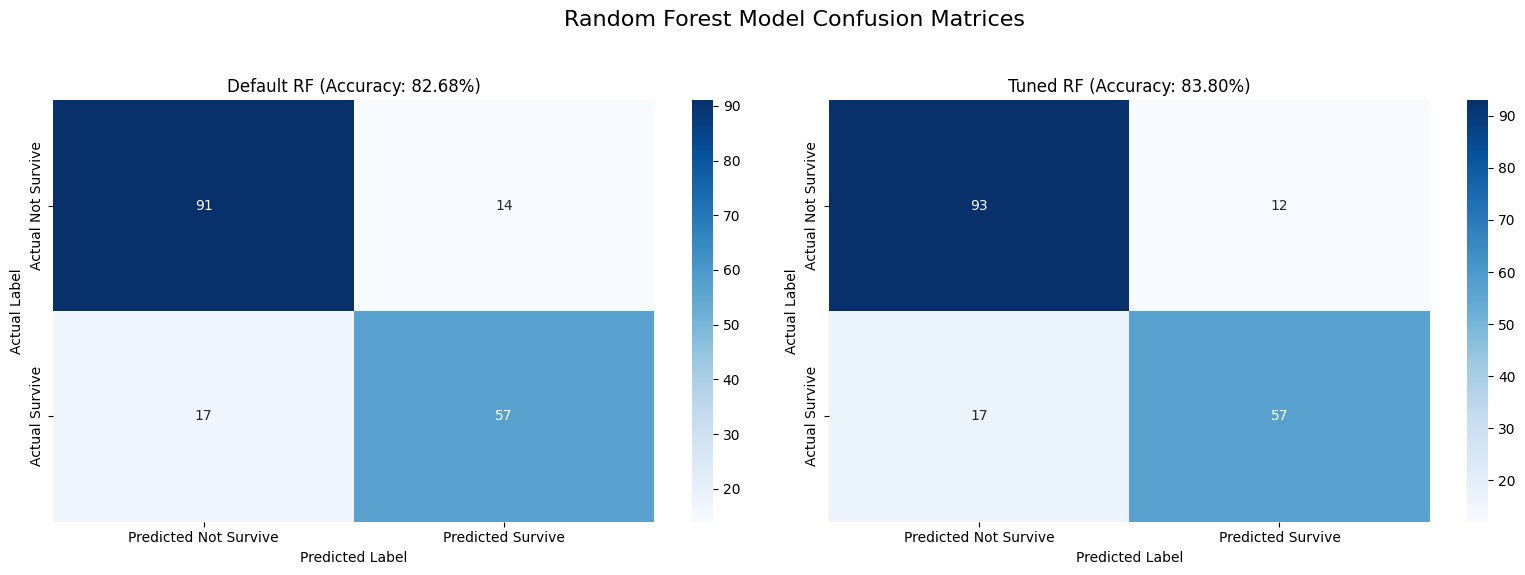

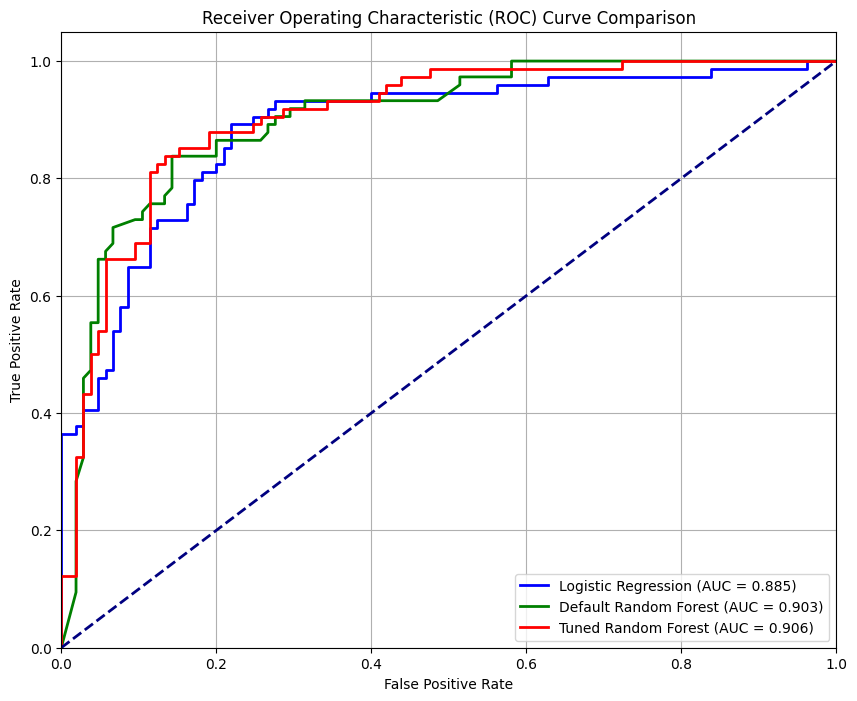

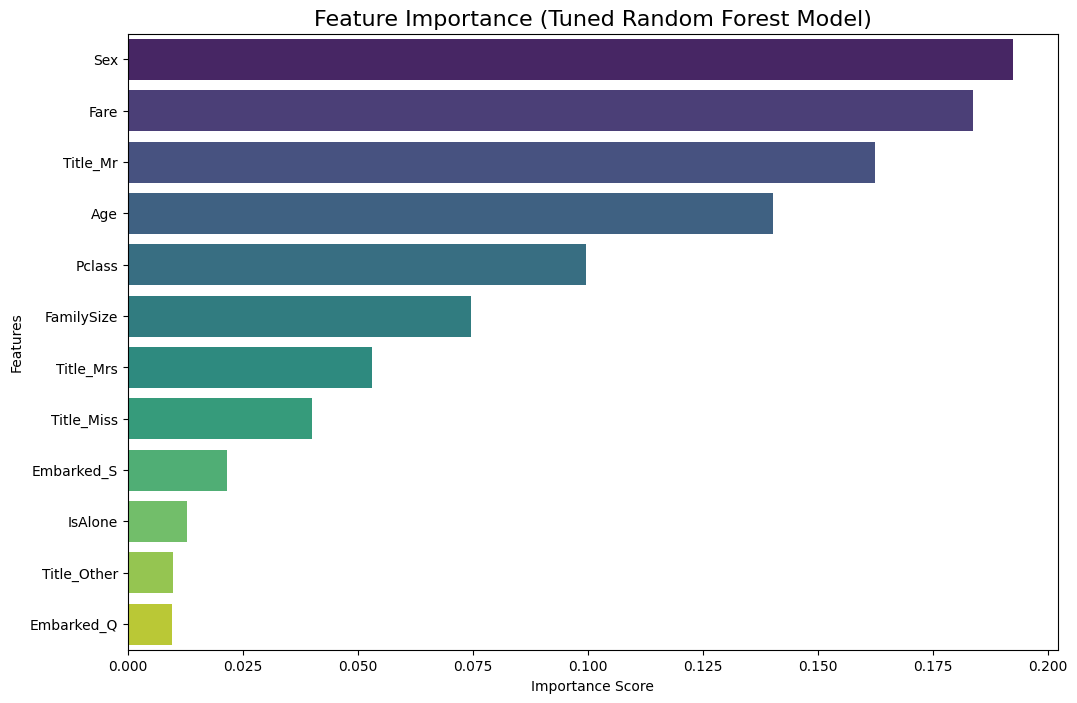

In [4]:
def main():
    loaded_data = load_models_and_data()
    
    if loaded_data:
        X_test, y_test, model_lr, model_rf, model_tuned_rf = loaded_data
        generate_visualizations(X_test, y_test, model_lr, model_rf, model_tuned_rf)

if __name__ == "__main__":
    main()